### 1. Problem statement:
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course. 


### 2. Data collection

#### 2.1. Importing the necessary packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
import warnings
warnings.filterwarnings("ignore")

#### 2.2. Importing data from CSV file 


In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 2.3. Analyzing the data 


In [3]:
df.shape

(1000, 8)

#### 2.3.1. Checking for missing values 

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### Observation:
No missing data found in the data set

#### 2.3.2. Checking for duplicates

In [5]:
df.duplicated().sum()

0

##### Observation:
No duplicates found in the data set.

2.3.3. Check for data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 2.3.4. Checking for no of unique elements in each column 

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 2.3.5. Checking for statistics in the data: 

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Observations:
1. From the analysis of the numerical data, mean value of all the scores is nearly same (66-68)
2. Standard deviation of all the scores is nearly same ~ 15

##### 2.3.6. Exploring the data 


In [11]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [30]:
print("Categories present in the Gender column are:\n",df['gender'].value_counts())
print("* *"*20)
print("Categories present in the Race_ethnicity column are:\n",df['race_ethnicity'].value_counts())
print("* *"*20)
print("Categories present in the Parent level of education column are:\n",df['parental_level_of_education'].value_counts())
print("* *"*20)
print("Categories in Lunch column are:\n",df['lunch'].value_counts())
print("* *"*20)
print("Categories from Test_prep_course are:\n",df['test_preparation_course'].value_counts())
print("* *"*20)

Categories present in the Gender column are:
 female    518
male      482
Name: gender, dtype: int64
* ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** *
Categories present in the Race_ethnicity column are:
 group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64
* ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** *
Categories present in the Parent level of education column are:
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64
* ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** *
Categories in Lunch column are:
 standard        645
free/reduced    355
Name: lunch, dtype: int64
* ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** *
Categories from Test_prep_course are:
 none         642
completed    358
Name: test_preparation_course, dtype: int64
* ** *

In [39]:
# Define Categorical and numerical columns 
categorical = [i for i in df.columns if df[i].dtype =='O']
numerical_variables = [i for i in df.columns if df[i].dtype!='O']
print("The Categorical variables present in the current data frame are:\n",categorical)
print("The Numerical columns available in the dataset are:\n",numerical_variables)


The Categorical variables present in the current data frame are:
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
The Numerical columns available in the dataset are:
 ['math_score', 'reading_score', 'writing_score']


#### 2.3.6. Adding Total_Score and Average_score columns in the dataframe

In [41]:
df['Total_score'] = df['math_score'] +df['writing_score']+df['reading_score']
df['Avg_score'] = df['Total_score']/3
df.head(4)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333


#### 2.3.7. Generating insights:

In [47]:
# Analyzing the top performers in each subject 
print("Top performers in Maths: \n",len(df[df['math_score']==100]))
print("Top performers in Reading: \n",len(df[df['reading_score']==100]))
print("Top performers in Writing: \n",len(df[df['writing_score']==100]))

Top performers in Maths: 
 7
Top performers in Reading: 
 17
Top performers in Writing: 
 14


In [48]:
# No of students who got above 90 in each subject\
print("Top performers in Maths: \n",len(df[df['math_score']>=90]))
print("Top performers in Reading: \n",len(df[df['reading_score']>=90]))
print("Top performers in Writing: \n",len(df[df['writing_score']>=90]))

Top performers in Maths: 
 58
Top performers in Reading: 
 79
Top performers in Writing: 
 78


In [49]:
# Students failed in the each subject
print("Students failed in Maths: \n",len(df[df['math_score']<35]))
print("Students failed in Reading: \n",len(df[df['reading_score']<35]))
print("Students failed in Writing: \n",len(df[df['writing_score']<35]))

Students failed in Maths: 
 22
Students failed in Reading: 
 15
Students failed in Writing: 
 17


##### Observations:
1. Majority of the students are performing good in the Reading. 
2. More no of students are struggling with mathematics comparing to other subjects 

### 3. Visualizing the data for better understanding. 

#### 3.1. Visualizing the average score distribution 

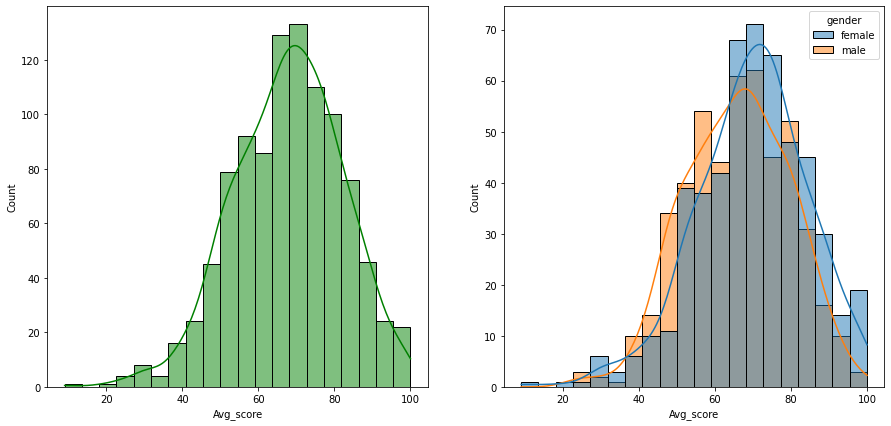

In [65]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sb.histplot(data=df,x='Avg_score',bins=20,kde=True,color='green')

plt.subplot(122)
sb.histplot(data=df,x='Avg_score',bins=20,kde=True,hue='gender')
plt.show()

<AxesSubplot:xlabel='Total_score', ylabel='Count'>

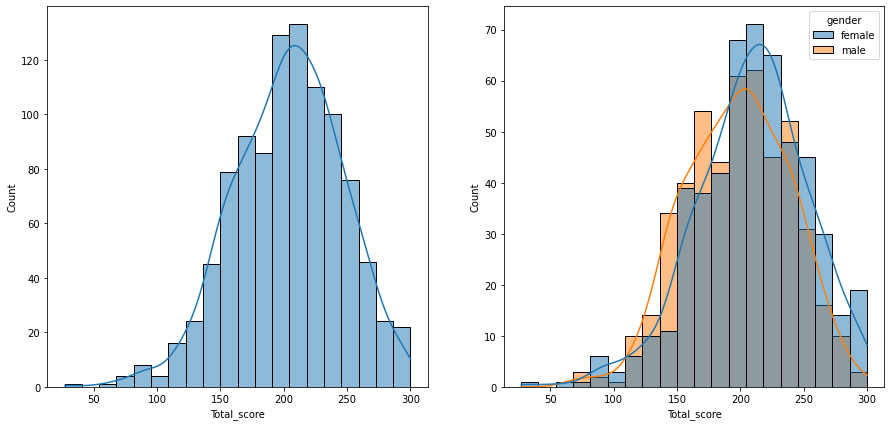

In [68]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sb.histplot(data=df,x='Total_score',kde=True,bins=20)

plt.subplot(122)
sb.histplot(data=df,x='Total_score',hue='gender',bins=20,kde=True)

##### Observations:
1. Female students are performing well in the exams.

<AxesSubplot:xlabel='Total_score', ylabel='Count'>

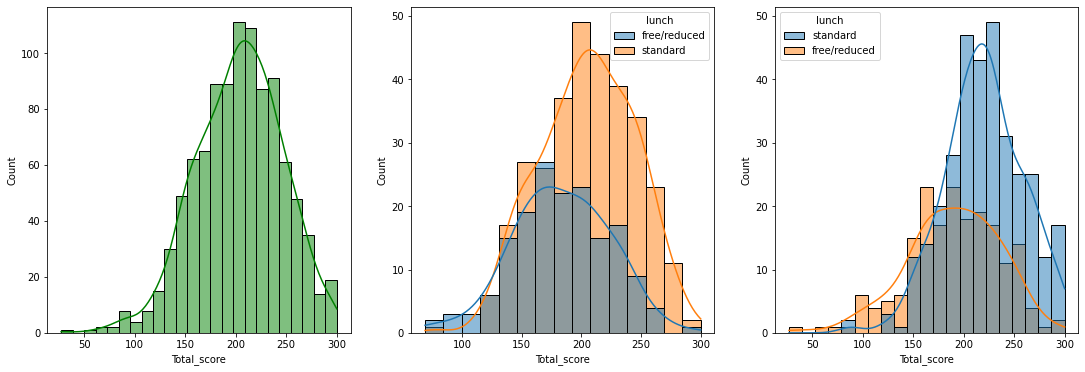

In [96]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sb.histplot(data=df,x='Total_score',kde=True,color='green')

plt.subplot(142)
sb.histplot(data=df[df['gender']=='male'],x='Total_score',kde=True, hue='lunch')

plt.subplot(143)
sb.histplot(data=df[df['gender']=='female'],x='Total_score',kde=True, hue='lunch')


##### Observation: 
Providing standard lunch tends to better results in the examination.

<AxesSubplot:xlabel='Total_score', ylabel='Count'>

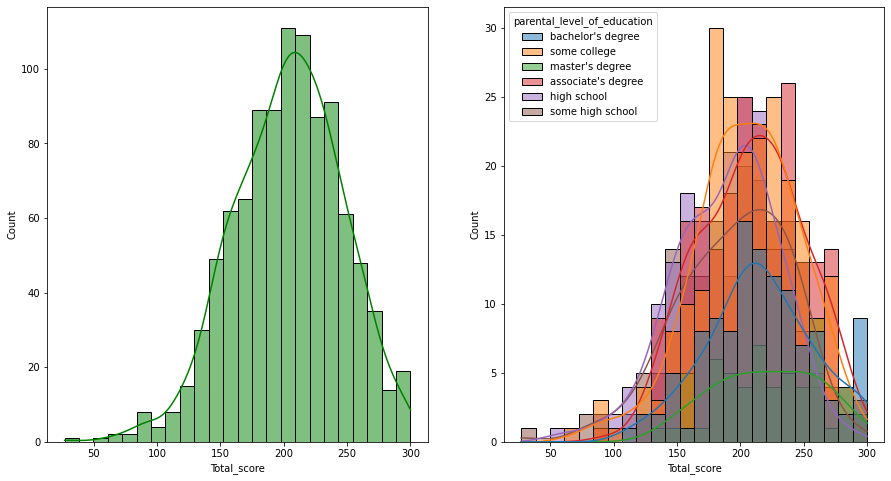

In [99]:
plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sb.histplot(data=df,x='Total_score',kde=True,color='green')

plt.subplot(122)
sb.histplot(data=df,x='Total_score',kde=True, hue='parental_level_of_education')



<AxesSubplot:xlabel='Total_score', ylabel='Count'>

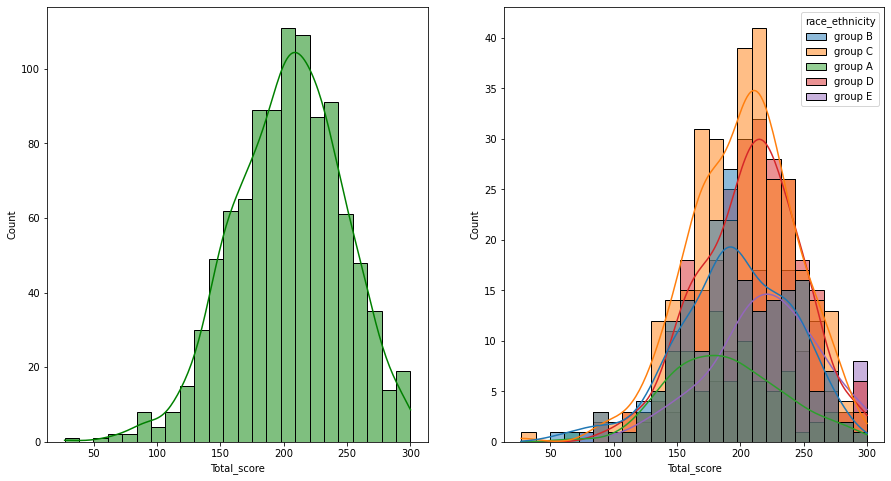

In [100]:
plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sb.histplot(data=df,x='Total_score',kde=True,color='green')

plt.subplot(122)
sb.histplot(data=df,x='Total_score',kde=True, hue='race_ethnicity')


##### Observation:
Students from Group A and B are performing poor in the exam.

<AxesSubplot:xlabel='Total_score', ylabel='Count'>

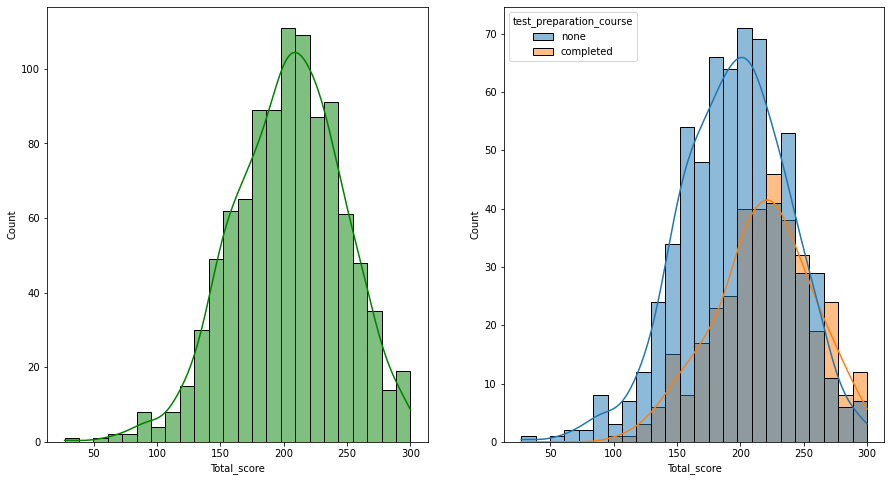

In [115]:
plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sb.histplot(data=df,x='Total_score',kde=True,color='green')

plt.subplot(122)
sb.histplot(data=df,x='Total_score',kde=True, hue='test_preparation_course')


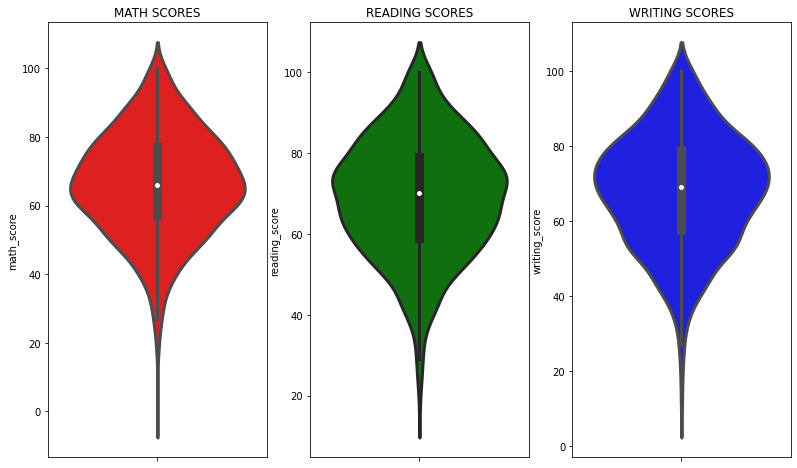

In [103]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sb.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sb.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sb.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

##### Observation:
Most of the students are performing good in reading and writing test comparing to Maths.

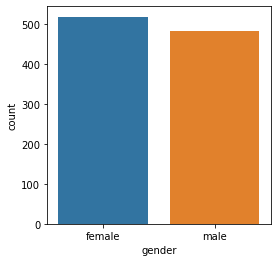

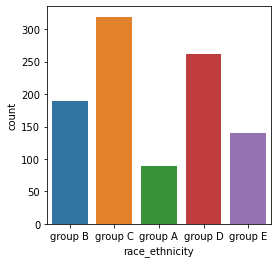

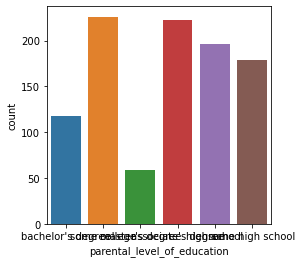

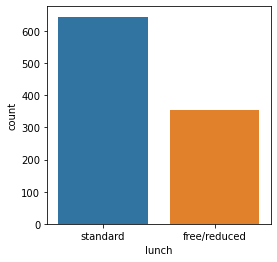

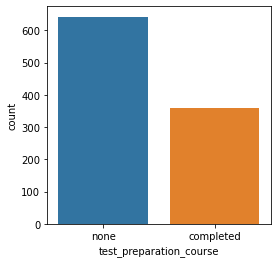

In [113]:
for i in categorical:
    plt.figure(figsize=(4,4))
    sb.countplot(df[i])
    plt.show()

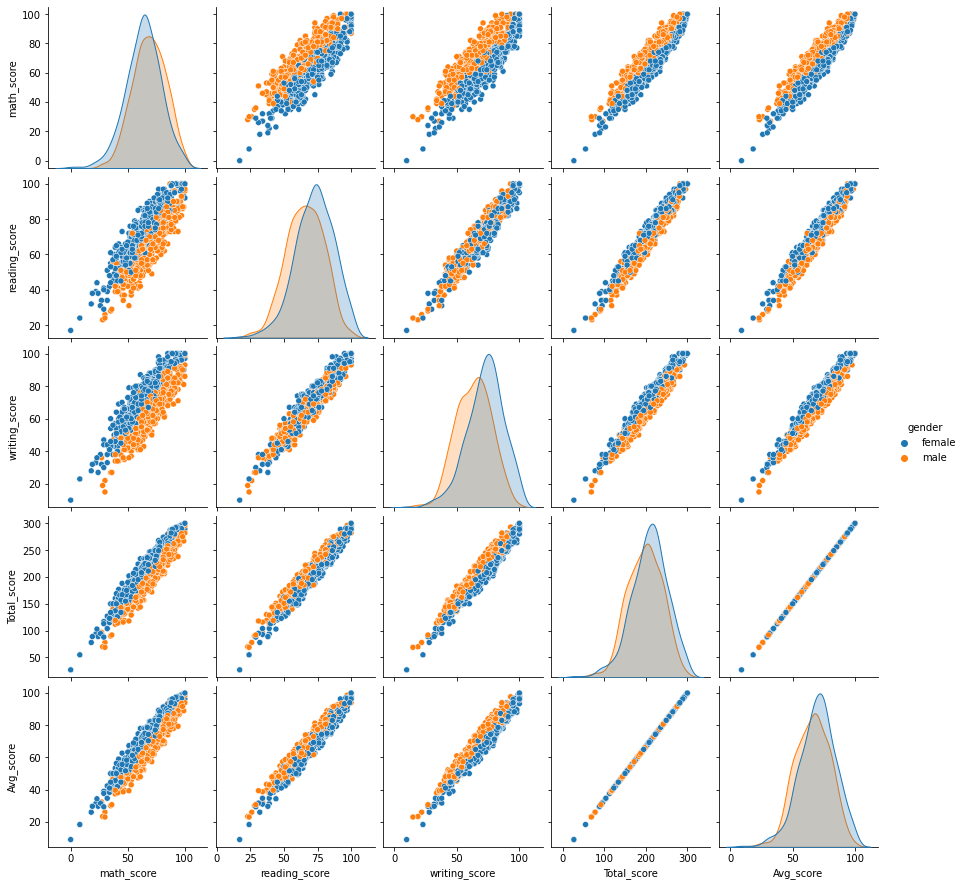

In [117]:
# Multivariate analysis using pairplot
sb.pairplot(df,hue = 'gender')
plt.show()

#### Conclusions:
1. Student's performance is related with Lunch, race, parental_education_level
2. Female students are performing better in the exam comparing with Male students. 
3. Finishing preparation course is beneficial
4. Students performace is not highly infludenced with the test preparation course.
